# Inference Demo of RealBasicVSR
This is a quick inference demo of  paper ["Investigating Tradeoffs in Real-World Video Super-Resolution"](https://arxiv.org/pdf/2111.12704.pdf). Our RealBasicVSR is simple and easy to implement. Yet, it is strong through effectively aggregating long-term information in the videos. Here is an example from our paper.




## 1. Preparation

First, please make sure that you have **enabled GPU** in `Runtime->Change runtime type`. Then we will 1) install dependencies and 2) clone RealBasicVSR repository.

In [1]:
# Install dependencies
!pip install openmim
!mim install mmcv-full
!pip install mmedit

# clone RealBasicVSR and download the pre-trained weights
!git clone https://github.com/ckkelvinchan/RealBasicVSR.git
%cd RealBasicVSR
!mkdir checkpoints
!wget https://www.dropbox.com/s/eufigxmmkv5woop/RealBasicVSR.pth?dl=0 -O checkpoints/RealBasicVSR_x4.pth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html


## 2. Inference with Images as Inputs

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2023-03-08 01:19:55,550 - mmedit - INFO - load checkpoint from torchvision path: torchvision://vgg19
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100% 548M/548M [00:05<00:00, 110MB/s]
load checkpoint from local path: checkpoints/RealBasicVSR_x4.pth
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  retur

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


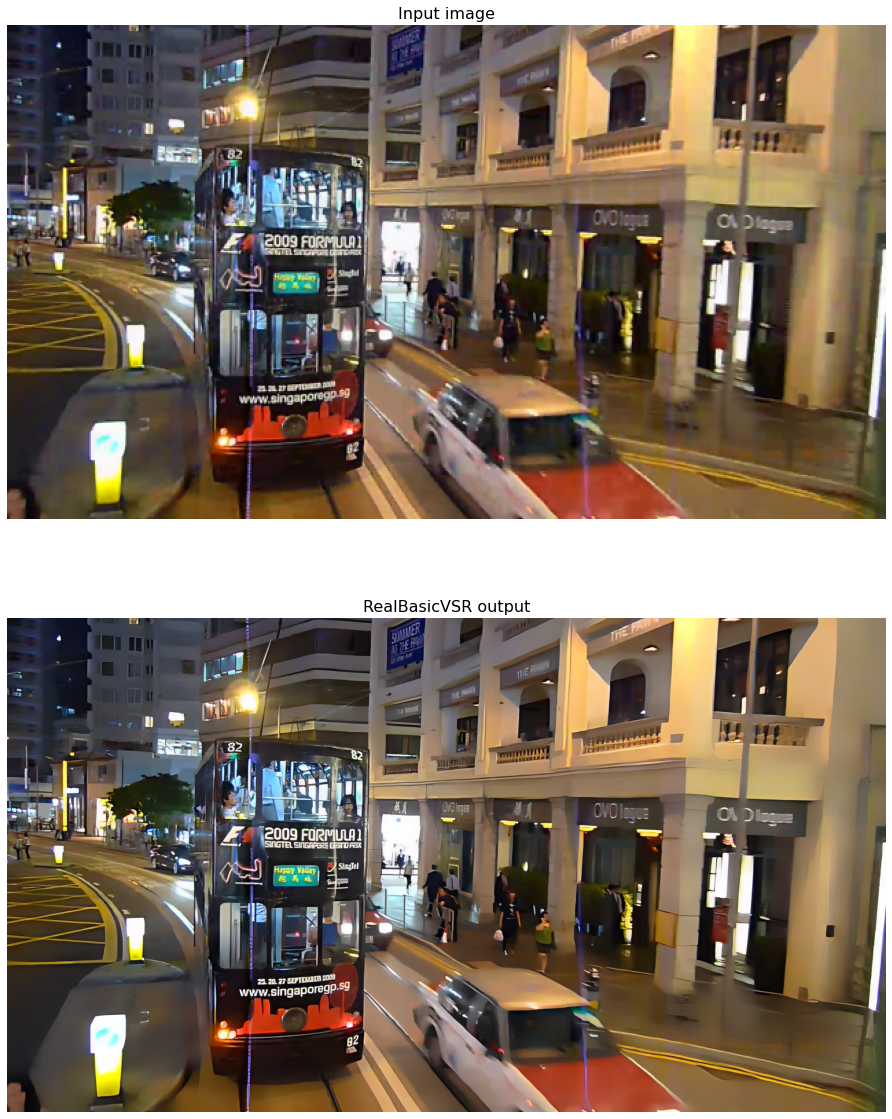

In [2]:
# compute the results given 1) configuration file, 2) checkpoint, 3) input directory, and 4) output directory (it may take a while to run)
!python inference_realbasicvsr.py configs/realbasicvsr_x4.py checkpoints/RealBasicVSR_x4.pth data/demo_000 results/demo_000

# show the first image as an example
import mmcv
import matplotlib.pyplot as plt

img_input = mmcv.imread('data/demo_000/00000000.png', channel_order='rgb') 
img_output = mmcv.imread('results/demo_000/00000000.png', channel_order='rgb') 

fig = plt.figure(figsize=(25, 20))
ax1 = fig.add_subplot(2, 1, 1) 
plt.title('Input image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(2, 1, 2)
plt.title('RealBasicVSR output', fontsize=16)
ax2.axis('off')
ax1.imshow(img_input)
ax2.imshow(img_output)


### 3. Inference with Videos as Inputs


In [ ]:
# compute the results given 1) configuration file, 2) checkpoint, 3) input path, and 4) output path (it may take a while to run)
# specify 'max_seq_len' if GPU memory is not enough
!python inference_realbasicvsr.py configs/realbasicvsr_x4.py checkpoints/RealBasicVSR_x4.pth data/video.mp4 results/video.mp4 --max_seq_len=20 --fps=12.5
# Your output video can be found in "results/demo_001.mp4"

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2023-03-08 01:42:13,900 - mmedit - INFO - load checkpoint from torchvision path: torchvision://vgg19
load checkpoint from local path: checkpoints/RealBasicVSR_x4.pth
